In [1]:
%pylab inline
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


#Exploring the data
First I load the data and print it out to see its structure.
Then I plot the output of the channels. From the plot I can see that the 3rd and 37th channel does not provide useful information about the seizure so I cut them out from the 'adat' array.

In [2]:
data=sio.loadmat('Seizure1')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Sep 01 19:13:34 2014',
 '__version__': '1.0',
 'adat': array([[-16,  -4, -81, ...,  82,  54,  41],
        [-17,  -5, -80, ...,  81,  54,  41],
        [-17,  -4, -81, ...,  80,  54,  41],
        ...,
        [ 36,  25,   6, ...,  -6,  17,  12],
        [ 35,  24,   6, ...,  -4,  17,  13],
        [ 34,  24,   6, ...,  -2,  17,  13]], dtype=int16)}

In [113]:
data['adat'][0][1] # wanted to see how I can reach specific elements

-4

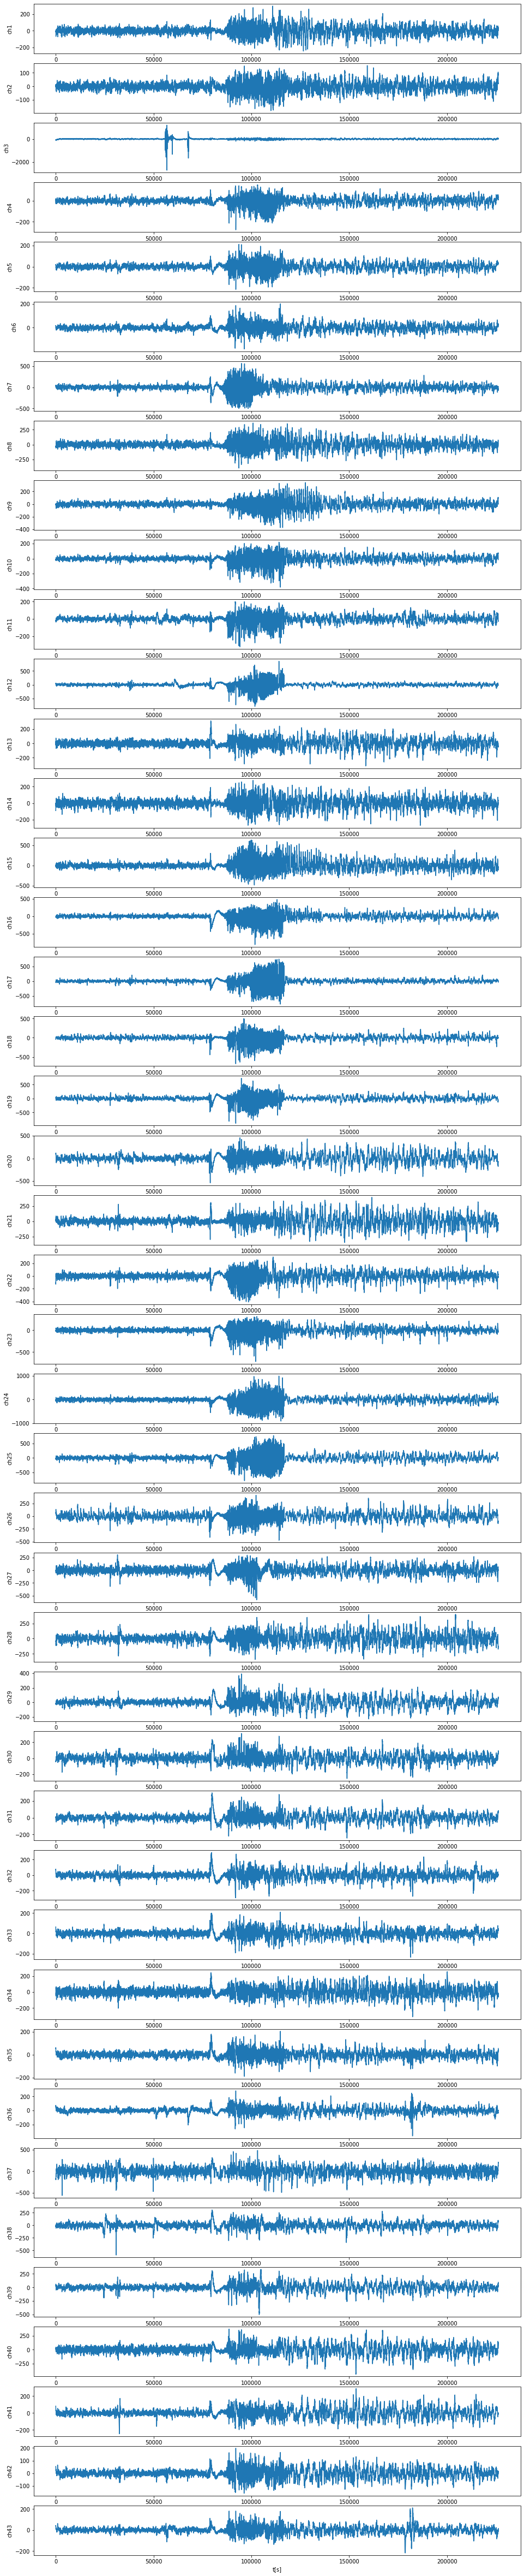

In [114]:
# plotting
figure(figsize=(16,86))

for i in range(43):
    subplot(43,1,i+1)
    plot(data['adat'][:,i])
    ylabel('ch'+str(i+1))
    xlabel('t[s]')

In [3]:
#deleting the 3rd and 37th channel from the dataset
data_cut = np.delete(data['adat'], 36, axis=1)
data_cut = np.delete(data_cut, 2, axis=1)

In [4]:
data_cut[0].size

41

#Data analysis
##Fourier transformation
To effectively compare the spectrum before the seizure and during the seizure I will do fourier analysis on them. I will divide the data into three parts. From 0-75s (before the seizure), from 75-120s (seizure), and from 120s to the end (after seizure).

In [117]:
#dividing data
before=data_cut[0:75000,:]
seizure=data_cut[75000:120000,:]
after=data_cut[120000:,:]

In [118]:
from scipy.fft import rfft, rfftfreq


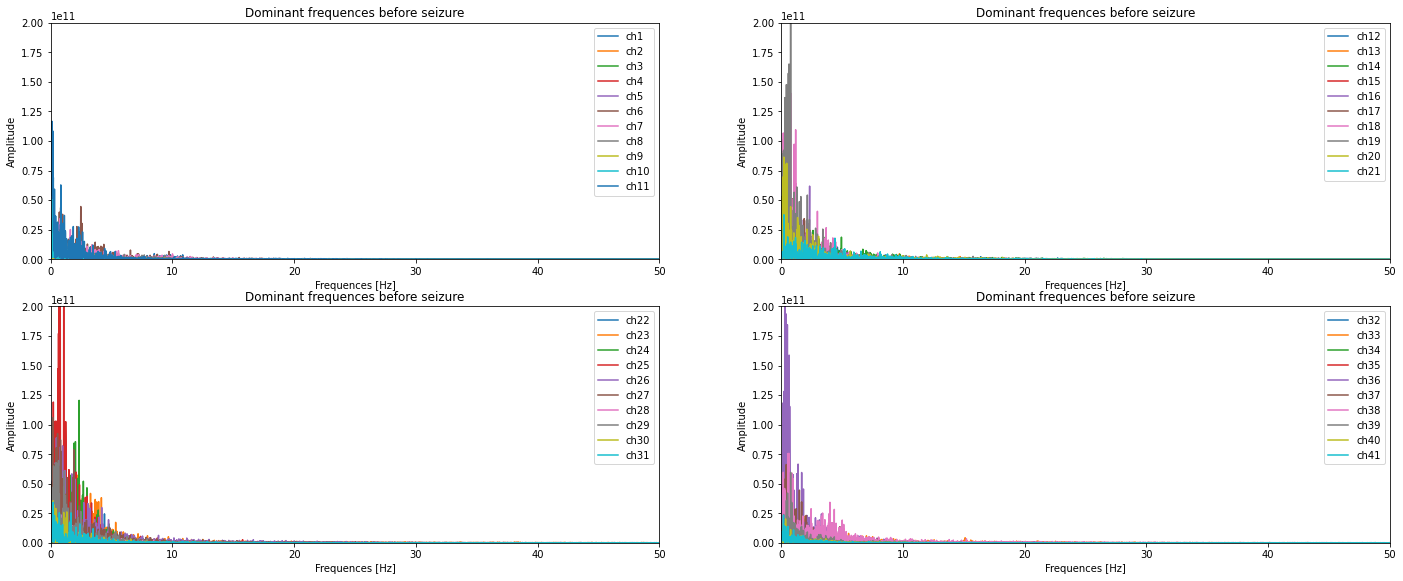

In [119]:
figure(figsize=(24,20))

subplot(4,2,1)
for i in range(0,11):
  N = before[:,i].size
  yf = rfft(before[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences before seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

subplot(4,2,2)
for i in range(11,21):
  N = before[:,i].size
  yf = rfft(before[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences before seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

subplot(4,2,3)
for i in range(21,31):
  N = before[:,i].size
  yf = rfft(before[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences before seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

subplot(4,2,4)
for i in range(31,41):
  N = before[:,i].size
  yf = rfft(before[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences before seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

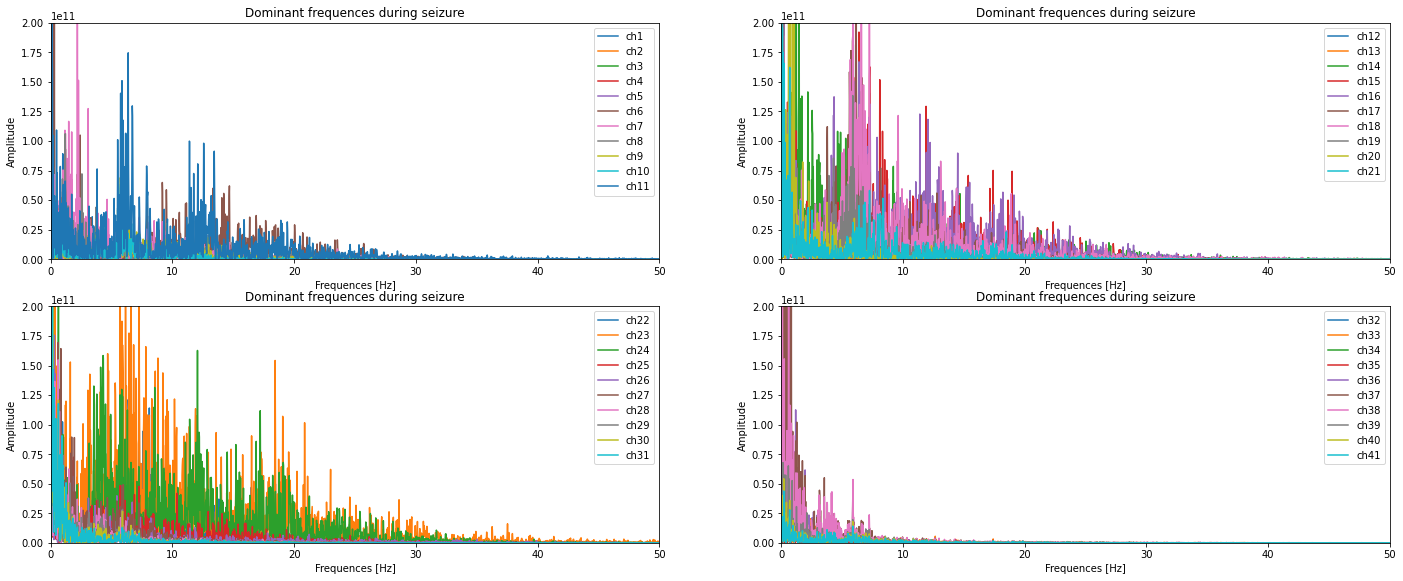

In [120]:
figure(figsize=(24,20))

subplot(4,2,1)
for i in range(0,11):
  N = seizure[:,i].size
  yf = rfft(seizure[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences during seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

subplot(4,2,2)
for i in range(11,21):
  N = seizure[:,i].size
  yf = rfft(seizure[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences during seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

subplot(4,2,3)
for i in range(21,31):
  N = seizure[:,i].size
  yf = rfft(seizure[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences during seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

subplot(4,2,4)
for i in range(31,41):
  N = seizure[:,i].size
  yf = rfft(seizure[:,i])
  xf = rfftfreq(N, 1/1000) #sample rate=1000
  plt.plot(xf, np.abs(yf)**2,label='ch'+str(i+1))
  legend()
  ylim(0,2e11)
  xlim(0,50)
  title('Dominant frequences during seizure')
  xlabel('Frequences [Hz]')
  ylabel('Amplitude')

We can see that before the seizure the distribution of frequences decay exponentally, the dominant frequences can be observed between 0-10Hz. During the seizure we can observe higher frequencies up to 20 or even 30Hz and there is a big characteristic spike around 6-7Hz, although not on every channel.

##Wavelet transformation
To investigate the time evolution of the data I used wavelet transformation on it. The runtime of the plotting was very high unfortunately, therefore I did not plot all 43 channels. I used the first plot at the very beggining to choose channels that are good candidates for sensing and recording the seizure first. 
I choosed to further investigate channel 13, 16, 20, 21, 31 and 32.

In [4]:
data2 = array([data_cut[:,i] for i in range(41)]) #change the indexing the data to decrease runtime

In [5]:
from scipy import signal

In [6]:
t = linspace(50,150,100000 )
w = 6
freq = np.logspace(-1, 2, 100)
widths = w*1000 / (2*freq*np.pi)

In [12]:
sig = data2[11,50000:150000]
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)

Text(0.5, 1.0, 'channel 13')

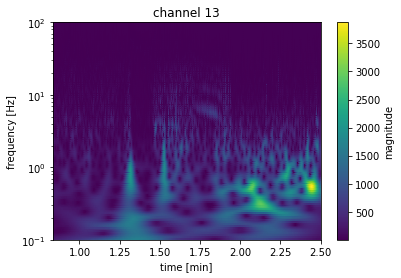

In [13]:
plt.pcolormesh(t/60, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
yscale("log")
colorbar(label="magnitude")
xlabel("time [min]")
ylabel("frequency [Hz]")
title("channel 13")

In [7]:
sig = data2[14,50000:150000]
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)

Text(0.5, 1.0, 'channel 16')

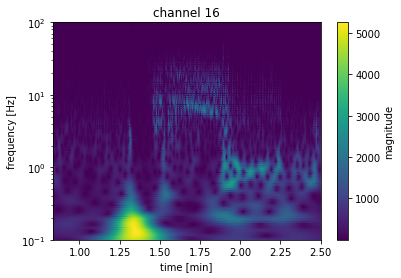

In [8]:
plt.pcolormesh(t/60, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
yscale("log")
colorbar(label="magnitude")
xlabel("time [min]")
ylabel("frequency [Hz]")
title("channel 16")

In [9]:
sig = data2[18,50000:150000]
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)

Text(0.5, 1.0, 'channel 20')

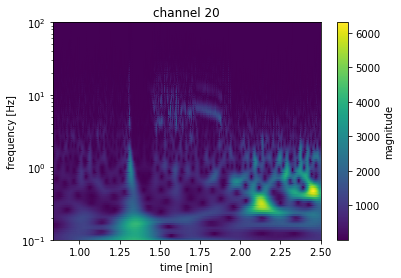

In [11]:
plt.pcolormesh(t/60, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
yscale("log")
colorbar(label="magnitude")
xlabel("time [min]")
ylabel("frequency [Hz]")
title("channel 20")

In [12]:
sig = data2[19,50000:150000]
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)

Text(0.5, 1.0, 'channel 21')

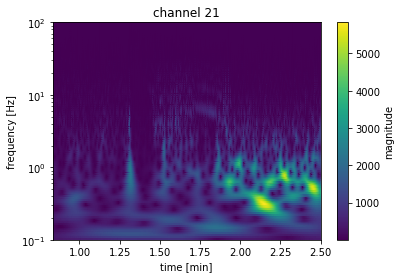

In [13]:
plt.pcolormesh(t/60, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
yscale("log")
colorbar(label="magnitude")
xlabel("time [min]")
ylabel("frequency [Hz]")
title("channel 21")

In [19]:
sig = data2[29,50000:150000]
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)

Text(0.5, 1.0, 'channel 31')

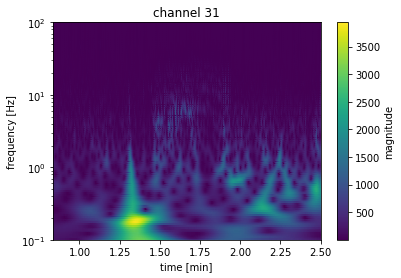

In [20]:
plt.pcolormesh(t/60, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
yscale("log")
colorbar(label="magnitude")
xlabel("time [min]")
ylabel("frequency [Hz]")
title("channel 31")

In [16]:
sig = data2[30,50000:150000]
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)

Text(0.5, 1.0, 'channel 32')

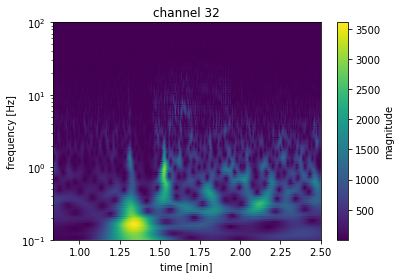

In [17]:
plt.pcolormesh(t/60, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
yscale("log")
colorbar(label="magnitude")
xlabel("time [min]")
ylabel("frequency [Hz]")
title("channel 32")

After comparing the figures above my opinion is that that channel 31 and 32 are the best guess according to which channels sensed the seizure first. There is a prominent peak around 1.3 minute.